In [1]:
# Install the DFA visualization library
!pip install visual-automata

# Import the DFA class
from visual_automata.fa.dfa import VisualDFA


  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 kB 2.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.8/80.8 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 97.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.4/69.4 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 386.9/386.9 kB 19.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.7/59.7 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.1/106.1 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 60.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.0/111.0 kB 6.9 MB/s eta 0:00:00
  Created wheel for colormath: filename=colormath-3.0.0-py3-none-any.whl size=39405 sha256=d0b98177cf6ae331a85ab85d6848c6be914017

In [2]:
# Define DFA components

# States
states = {"q0", "q1", "q2"}  # q2 is trap state

# Alphabet categories
alphabet = {"lower", "other"}  # lowercase letters vs everything else

# Transition function
transition_function = {
    "q0": {"lower": "q1", "other": "q2"},
    "q1": {"lower": "q1", "other": "q2"},
    "q2": {"lower": "q2", "other": "q2"}  # trap state loops to itself
}

# Start and Accept states
start_state = "q0"
accept_states = {"q1"}


In [3]:
# Create DFA object
dfa = VisualDFA(
    states=states,
    input_symbols=alphabet,
    transitions=transition_function,
    initial_state=start_state,
    final_states=accept_states
)


In [4]:
# Function to classify each character as 'lower' or 'other'
def classify_char(ch):
    if "a" <= ch <= "z":
        return "lower"
    return "other"


In [5]:
# Function to check if a word is accepted by the DFA
def classify_word(word):
    state = start_state
    for ch in word:
        symbol = classify_char(ch)
        state = transition_function[state][symbol]
    return "Accepted" if state in accept_states else "Not Accepted"


In [6]:
# Test words
words = ["cat", "dog", "a", "zebra", "dog1", "1dog", "DogHouse", "Dog_house", " cats"]

for w in words:
    print(f"{w!r}: {classify_word(w)}")


'cat': Accepted
'dog': Accepted
'a': Accepted
'zebra': Accepted
'dog1': Not Accepted
'1dog': Not Accepted
'DogHouse': Not Accepted
'Dog_house': Not Accepted
' cats': Not Accepted


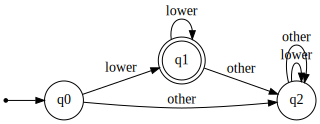

In [7]:
# Show DFA diagram
dfa.show_diagram(view=True)  # Opens in a new window

# Save DFA diagram as PNG
dfa.show_diagram(filename="simplified_english_dfa.png")
